<a href="https://colab.research.google.com/github/tya2aa2/TYAPROJECT-/blob/main/CURN_PREDICTION_DATA_GANGGUAN_PASCA_PSB_INDIHOME_TREG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADHITYA MELANI EKA JANARWATI

PREDICTION DATA GANGGUAN PASCA PSB(PASANG BARU)

Dalam hal ini ada dilakukukan prediksi terhadap terhadap gangguan pasang baru yang dilihat dari redaman

In [ ]:
# Library analisis data
import pandas as pd
# Library membuat grafik dan visualisasi data
import matplotlib.pyplot as plt
# Library komputasi numerik
import numpy as np
import json
# menyimpan objek Python ke file dan kemudian mengembalikannya ke objek Python asli.
import pickle
import joblib

In [ ]:
#MOUNT DATA DI GRRIVE
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/SEMESTER7/reg3'

Mounted at /content/drive


In [ ]:
#MENAMPILAKAN DATA
dataset = pd.read_csv("{}/dataset.csv".format(path), sep=';')
dataset

,NO INET,Column2,Redaman,Column13,Column14,Column15,USAGE,Column21
0,121811900032,telkom.net,-20.31,-23.88,UP-11264KB0,DOWN-33792KB0,3.14 GB,ONLINE
1,121811900047,telkom.net,-22.07,-24.95,UP-11264KB0,DOWN-33792KB0,738.77 MB,ONLINE
2,121812299077,telkom.net,-18.928,-19.431,UP-19456KB0,DOWN-56320KB0,2.49 MB,ONLINE
3,122805213008,telkom.net,-16.02,-17.94,UP-11264KB0,DOWN-33792KB0,3.47 GB,ONLINE
4,122805213041,telkom.net,-19.2,-20.41,UP-11264KB0,DOWN-33792KB0,1.76 GB,ONLINE
...,...,...,...,...,...,...,...,...
28732,131644100282,telkom.net,-22.75,-27.45,UP-11264KB0,DOWN-33792KB0,2.98 GB,ONLINE
28733,139239100066,telkom.net,-18.6,-19.51,UP-11264KB0,DOWN-33792KB0,3.32 GB,ONLINE
28734,139239100067,telkom.net,-18.69,-20.12,UP-11264KB0,DOWN-33792KB0,3.24 GB,ONLINE
28735,139239100070,telkom.net,-22.36,-21.94,UP-11264KB0,DOWN-33792KB0,873.14 MB,ONLINE


In [ ]:
print(dataset.columns)

Index(['NO INET', 'Column2', 'Redaman ', 'Column13', 'Column14', 'Column15',
       'USAGE', 'Column21'],
      dtype='object')


In [ ]:
# Menambahkan kolom label/Membuat kolom table
dataset['Label'] = 0  # Inisialisasi dengan 0
dataset

,NO INET,Column2,Redaman,Column13,Column14,Column15,USAGE,Column21,Label
0,121811900032,telkom.net,-20.31,-23.88,UP-11264KB0,DOWN-33792KB0,3.14 GB,ONLINE,0
1,121811900047,telkom.net,-22.07,-24.95,UP-11264KB0,DOWN-33792KB0,738.77 MB,ONLINE,0
2,121812299077,telkom.net,-18.928,-19.431,UP-19456KB0,DOWN-56320KB0,2.49 MB,ONLINE,0
3,122805213008,telkom.net,-16.02,-17.94,UP-11264KB0,DOWN-33792KB0,3.47 GB,ONLINE,0
4,122805213041,telkom.net,-19.2,-20.41,UP-11264KB0,DOWN-33792KB0,1.76 GB,ONLINE,0
...,...,...,...,...,...,...,...,...,...
28732,131644100282,telkom.net,-22.75,-27.45,UP-11264KB0,DOWN-33792KB0,2.98 GB,ONLINE,0
28733,139239100066,telkom.net,-18.6,-19.51,UP-11264KB0,DOWN-33792KB0,3.32 GB,ONLINE,0
28734,139239100067,telkom.net,-18.69,-20.12,UP-11264KB0,DOWN-33792KB0,3.24 GB,ONLINE,0
28735,139239100070,telkom.net,-22.36,-21.94,UP-11264KB0,DOWN-33792KB0,873.14 MB,ONLINE,0


In [ ]:
import pandas as pd

# Asumsi dataframe 'dataset' sudah ada
# Konversi kolom 'Redaman ' ke float
dataset['Redaman '] = pd.to_numeric(dataset['Redaman '], errors='coerce')

# Opsional: Mengisi nilai NaN dengan nilai tertentu (misal 0, atau bisa dihapus)
dataset['Redaman '].fillna(0, inplace=True)  # Contoh mengisi dengan 0
dataset

,NO INET,Column2,Redaman,Column13,Column14,Column15,USAGE,Column21,Label
0,121811900032,telkom.net,-20.310,-23.88,UP-11264KB0,DOWN-33792KB0,3.14 GB,ONLINE,0
1,121811900047,telkom.net,-22.070,-24.95,UP-11264KB0,DOWN-33792KB0,738.77 MB,ONLINE,0
2,121812299077,telkom.net,-18.928,-19.431,UP-19456KB0,DOWN-56320KB0,2.49 MB,ONLINE,0
3,122805213008,telkom.net,-16.020,-17.94,UP-11264KB0,DOWN-33792KB0,3.47 GB,ONLINE,0
4,122805213041,telkom.net,-19.200,-20.41,UP-11264KB0,DOWN-33792KB0,1.76 GB,ONLINE,0
...,...,...,...,...,...,...,...,...,...
28732,131644100282,telkom.net,-22.750,-27.45,UP-11264KB0,DOWN-33792KB0,2.98 GB,ONLINE,0
28733,139239100066,telkom.net,-18.600,-19.51,UP-11264KB0,DOWN-33792KB0,3.32 GB,ONLINE,0
28734,139239100067,telkom.net,-18.690,-20.12,UP-11264KB0,DOWN-33792KB0,3.24 GB,ONLINE,0
28735,139239100070,telkom.net,-22.360,-21.94,UP-11264KB0,DOWN-33792KB0,873.14 MB,ONLINE,0


In [ ]:
# Menambahkan kolom label
dataset['Label'] = 0  # Inisialisasi kolom label dengan 0
dataset.loc[(dataset['Redaman '] < -14.0) & (dataset['Redaman '] > -24.0), 'Label'] = 1
dataset.loc[(dataset['Redaman '] > -14.0) | (dataset['Redaman '] < -24.0), 'Label'] = 0
dataset

,NO INET,Column2,Redaman,Column13,Column14,Column15,USAGE,Column21,Label
0,121811900032,telkom.net,-20.310,-23.88,UP-11264KB0,DOWN-33792KB0,3.14 GB,ONLINE,1
1,121811900047,telkom.net,-22.070,-24.95,UP-11264KB0,DOWN-33792KB0,738.77 MB,ONLINE,1
2,121812299077,telkom.net,-18.928,-19.431,UP-19456KB0,DOWN-56320KB0,2.49 MB,ONLINE,1
3,122805213008,telkom.net,-16.020,-17.94,UP-11264KB0,DOWN-33792KB0,3.47 GB,ONLINE,1
4,122805213041,telkom.net,-19.200,-20.41,UP-11264KB0,DOWN-33792KB0,1.76 GB,ONLINE,1
...,...,...,...,...,...,...,...,...,...
28732,131644100282,telkom.net,-22.750,-27.45,UP-11264KB0,DOWN-33792KB0,2.98 GB,ONLINE,1
28733,139239100066,telkom.net,-18.600,-19.51,UP-11264KB0,DOWN-33792KB0,3.32 GB,ONLINE,1
28734,139239100067,telkom.net,-18.690,-20.12,UP-11264KB0,DOWN-33792KB0,3.24 GB,ONLINE,1
28735,139239100070,telkom.net,-22.360,-21.94,UP-11264KB0,DOWN-33792KB0,873.14 MB,ONLINE,1


In [ ]:
dataset['Label'].value_counts()

Label
1    27104
0     1633
Name: count, dtype: int64

In [ ]:
#drop kolom pertama
dataset = dataset.drop(columns=['Column2'])
dataset = dataset.drop(columns=['Column13'])

In [ ]:
# Make a vector to contain all unique word in 'Column2'

unique_string = set()
for x in dataset['Column21']:
    for y in x.split():
        unique_string.add(y)

print("Jumlah macam string di kolom 2 :", (unique_string))

Jumlah macam string di kolom 2 : {'UNKNOWN', '\\N', 'ONLINE', 'DOWN'}


In [ ]:
#drop kolom pertama
dataset = dataset.drop(columns=['Column21'])
dataset

,NO INET,Redaman,Column14,Column15,USAGE,Label
0,121811900032,-20.310,UP-11264KB0,DOWN-33792KB0,3.14 GB,1
1,121811900047,-22.070,UP-11264KB0,DOWN-33792KB0,738.77 MB,1
2,121812299077,-18.928,UP-19456KB0,DOWN-56320KB0,2.49 MB,1
3,122805213008,-16.020,UP-11264KB0,DOWN-33792KB0,3.47 GB,1
4,122805213041,-19.200,UP-11264KB0,DOWN-33792KB0,1.76 GB,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,UP-11264KB0,DOWN-33792KB0,2.98 GB,1
28733,139239100066,-18.600,UP-11264KB0,DOWN-33792KB0,3.32 GB,1
28734,139239100067,-18.690,UP-11264KB0,DOWN-33792KB0,3.24 GB,1
28735,139239100070,-22.360,UP-11264KB0,DOWN-33792KB0,873.14 MB,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Menggunakan LabelEncoder untuk mengubah string menjadi integer
label_encoder = LabelEncoder()
dataset['Column14'] = label_encoder.fit_transform(dataset['Column14'])

# Menampilkan beberapa baris dari dataset setelah encoding
print("\nDataset Setelah Label Encoding:")
print(dataset.head())

# Menampilkan informasi unik dan mapping dari LabelEncoder
print("\nLabel Mapping:")
for class_index in range(len(label_encoder.classes_)):
    print(f"{label_encoder.classes_[class_index]} -> {class_index}")

dataset



Dataset Setelah Label Encoding:
        NO INET  Redaman   Column14       Column15      USAGE  Label
0  121811900032   -20.310         3  DOWN-33792KB0    3.14 GB      1
1  121811900047   -22.070         3  DOWN-33792KB0  738.77 MB      1
2  121812299077   -18.928         7  DOWN-56320KB0    2.49 MB      1
3  122805213008   -16.020         3  DOWN-33792KB0    3.47 GB      1
4  122805213041   -19.200         3  DOWN-33792KB0    1.76 GB      1

Label Mapping:
- -> 0
No such Instance -> 1
UP-112640KB0 -> 2
UP-11264KB0 -> 3
UP-141KB0 -> 4
UP-15360KB0 -> 5
UP-16896KB0 -> 6
UP-19456KB0 -> 7
UP-22528KB0 -> 8
UP-2253KB0 -> 9
UP-337920KB0 -> 10
UP-33792KB0 -> 11
UP-37888KB0 -> 12
UP-4096KB0 -> 13
UP-45060KB0 -> 14
UP-4506KB0 -> 15
UP-451KB0 -> 16
UP-56320KB0 -> 17
UP-564KB0 -> 18
UP-57KB0 -> 19
UP-6759KB0 -> 20
UP-75776KB0 -> 21
UP-8192KB0 -> 22
UP-9012KB0 -> 23
UP2253KA4 -> 24
\N -> 25
nan -> 26


,NO INET,Redaman,Column14,Column15,USAGE,Label
0,121811900032,-20.310,3,DOWN-33792KB0,3.14 GB,1
1,121811900047,-22.070,3,DOWN-33792KB0,738.77 MB,1
2,121812299077,-18.928,7,DOWN-56320KB0,2.49 MB,1
3,122805213008,-16.020,3,DOWN-33792KB0,3.47 GB,1
4,122805213041,-19.200,3,DOWN-33792KB0,1.76 GB,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,3,DOWN-33792KB0,2.98 GB,1
28733,139239100066,-18.600,3,DOWN-33792KB0,3.32 GB,1
28734,139239100067,-18.690,3,DOWN-33792KB0,3.24 GB,1
28735,139239100070,-22.360,3,DOWN-33792KB0,873.14 MB,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Menggunakan LabelEncoder untuk mengubah string menjadi integer
label_encoder = LabelEncoder()
dataset['Column15'] = label_encoder.fit_transform(dataset['Column15'])

# Menampilkan beberapa baris dari dataset setelah encoding
print("\nDataset Setelah Label Encoding:")
print(dataset.head())

# Menampilkan informasi unik dan mapping dari LabelEncoder
print("\nLabel Mapping:")
for class_index in range(len(label_encoder.classes_)):
    print(f"{label_encoder.classes_[class_index]} -> {class_index}")

dataset



Dataset Setelah Label Encoding:
        NO INET  Redaman   Column14  Column15      USAGE  Label
0  121811900032   -20.310         3         8    3.14 GB      1
1  121811900047   -22.070         3         8  738.77 MB      1
2  121812299077   -18.928         7        11    2.49 MB      1
3  122805213008   -16.020         3         8    3.47 GB      1
4  122805213041   -19.200         3         8    1.76 GB      1

Label Mapping:
- -> 0
DOWN-102400KB0 -> 1
DOWN-112640KB0 -> 2
DOWN-11264KB0 -> 3
DOWN-225280KB0 -> 4
DOWN-22528KB0 -> 5
DOWN-30720KB0 -> 6
DOWN-337920KB0 -> 7
DOWN-33792KB0 -> 8
DOWN-45056KB0 -> 9
DOWN-51200KB0 -> 10
DOWN-56320KB0 -> 11
DOWN-564KB0 -> 12
DOWN-76800K -> 13
DOWN-78848K -> 14
DOWN-84992KB0 -> 15
DOWN-9012KA4 -> 16
DOWN8MKA4 -> 17
DOWN9012KA4 -> 18
No such Instance -> 19
\N -> 20
nan -> 21


,NO INET,Redaman,Column14,Column15,USAGE,Label
0,121811900032,-20.310,3,8,3.14 GB,1
1,121811900047,-22.070,3,8,738.77 MB,1
2,121812299077,-18.928,7,11,2.49 MB,1
3,122805213008,-16.020,3,8,3.47 GB,1
4,122805213041,-19.200,3,8,1.76 GB,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,3,8,2.98 GB,1
28733,139239100066,-18.600,3,8,3.32 GB,1
28734,139239100067,-18.690,3,8,3.24 GB,1
28735,139239100070,-22.360,3,8,873.14 MB,1


In [ ]:
# Mengubah nama kolom 'Column14' menjadi 'UPKB'
dataset.rename(columns={'Column14': 'UPKB'}, inplace=True)

# Mengubah nama kolom 'Column14' menjadi 'DOWNKB'
dataset.rename(columns={'Column15': 'DOWNKB'}, inplace=True)

In [ ]:
# Menghapus baris dengan nilai kosong
dataset = dataset.dropna()

# Menghapus kolom dengan nilai kosong
dataset = dataset.dropna(axis=1)
dataset

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
0,121811900032,-20.310,3,8,3.14 GB,1
1,121811900047,-22.070,3,8,738.77 MB,1
2,121812299077,-18.928,7,11,2.49 MB,1
3,122805213008,-16.020,3,8,3.47 GB,1
4,122805213041,-19.200,3,8,1.76 GB,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,3,8,2.98 GB,1
28733,139239100066,-18.600,3,8,3.32 GB,1
28734,139239100067,-18.690,3,8,3.24 GB,1
28735,139239100070,-22.360,3,8,873.14 MB,1


In [ ]:
dataset.dtypes

NO INET       int64
Redaman     float64
UPKB          int64
DOWNKB        int64
USAGE        object
Label         int64
dtype: object

In [ ]:
dataset

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
0,121811900032,-20.310,3,8,3.14 GB,1
1,121811900047,-22.070,3,8,738.77 MB,1
2,121812299077,-18.928,7,11,2.49 MB,1
3,122805213008,-16.020,3,8,3.47 GB,1
4,122805213041,-19.200,3,8,1.76 GB,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,3,8,2.98 GB,1
28733,139239100066,-18.600,3,8,3.32 GB,1
28734,139239100067,-18.690,3,8,3.24 GB,1
28735,139239100070,-22.360,3,8,873.14 MB,1


In [ ]:
import pandas as pd

# Contoh DataFrame dengan kolom 'USAGE' yang mungkin berisi string
df = pd.DataFrame(dataset)

# Mengonversi kolom USAGE ke MB dan menghapus unitnya, lalu mengonversi ke integer
def convert_to_mb(value):
    value = value.replace(',', '')  # Menghapus tanda koma
    if 'GB' in value:
        return int(float(value.replace(' GB', '')) * 1024)
    elif 'MB' in value:
        return int(float(value.replace(' MB', '')))
    elif 'KB' in value:
        return int(float(value.replace(' KB', '')) / 1024)
    else:
        return value

df['USAGE'] = df['USAGE'].apply(convert_to_mb)

# Menampilkan dataframe yang telah diperbarui
display(df)

# Menampilkan 5 baris pertama dari dataset yang telah diperbarui
print(df.head())


,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
0,121811900032,-20.310,3,8,3215,1
1,121811900047,-22.070,3,8,738,1
2,121812299077,-18.928,7,11,2,1
3,122805213008,-16.020,3,8,3553,1
4,122805213041,-19.200,3,8,1802,1
...,...,...,...,...,...,...
28732,131644100282,-22.750,3,8,3051,1
28733,139239100066,-18.600,3,8,3399,1
28734,139239100067,-18.690,3,8,3317,1
28735,139239100070,-22.360,3,8,873,1


        NO INET  Redaman   UPKB  DOWNKB  USAGE  Label
0  121811900032   -20.310     3       8   3215      1
1  121811900047   -22.070     3       8    738      1
2  121812299077   -18.928     7      11      2      1
3  122805213008   -16.020     3       8   3553      1
4  122805213041   -19.200     3       8   1802      1


In [ ]:
df.head(50)

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
0,121811900032,-20.310,3,8,3215,1
1,121811900047,-22.070,3,8,738,1
2,121812299077,-18.928,7,11,2,1
3,122805213008,-16.020,3,8,3553,1
4,122805213041,-19.200,3,8,1802,1
5,122805213078,-17.800,7,11,334,1
6,122805234023,-20.320,7,11,531,1
7,122805234078,-16.590,7,11,2478,1
8,122805234091,-16.190,7,11,2959,1
9,122805234105,-15.270,7,11,3,1


In [ ]:
#membagi data menjadi 2 yaitu x, dan y
#x berisikan semua baris dan kolom 1 sampai kolom -1
#y berisikan semua baris dan kolom type saja
x, y = df.iloc[:, 0:-1], df.iloc[:, -1]

ValueError: x and y must be the same size

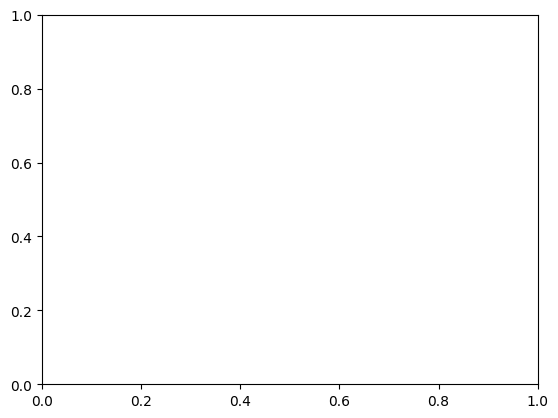

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
#SPLIT DATA
#20% test , 80% train
from sklearn.model_selection import train_test_split
#dengan porsi data test 0.2 , dengan sisanya data train 80%
dttrain, dttest= train_test_split(df, test_size = 0.2, stratify = y,random_state=46)

In [ ]:
dttrain

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
7913,131169155885,-17.440,7,11,4085,1
13051,131183184972,-19.546,12,2,1187,1
15137,131185116476,-18.820,7,11,3471,1
23164,131427174981,-20.862,13,3,1012,1
24067,131427189167,-18.010,9,3,4096,1
...,...,...,...,...,...,...
28227,131633117565,-20.316,3,8,68,1
7879,131169155824,-21.130,7,10,4096,1
19293,131252108723,-15.656,9,3,3655,1
14044,131184193507,-20.000,7,11,2201,1


In [ ]:
dttest

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
8906,131172156331,-19.10,7,11,818,1
12933,131183184662,-19.83,12,2,2416,1
8452,131171119904,-21.74,3,8,1996,1
4623,131161151246,-19.74,7,11,2856,1
9396,131173169304,-19.28,3,8,1085,1
...,...,...,...,...,...,...
22294,131317110667,-19.87,7,11,2816,1
3483,131157115963,-18.51,3,8,1259,1
17409,131239104426,-21.74,9,3,126,1
4736,131161151661,-14.46,7,11,1945,1


In [ ]:
#PERBANDINGAN HIV/HIVTB PADA DATA TRAIN
x_train, y_train = dttrain.iloc[:, 0:-1], dttrain.iloc[:, -1]

In [ ]:
x_train

,NO INET,Redaman,UPKB,DOWNKB,USAGE
7913,131169155885,-17.440,7,11,4085
13051,131183184972,-19.546,12,2,1187
15137,131185116476,-18.820,7,11,3471
23164,131427174981,-20.862,13,3,1012
24067,131427189167,-18.010,9,3,4096
...,...,...,...,...,...
28227,131633117565,-20.316,3,8,68
7879,131169155824,-21.130,7,10,4096
19293,131252108723,-15.656,9,3,3655
14044,131184193507,-20.000,7,11,2201


In [ ]:
y_train

7913     1
13051    1
15137    1
23164    1
24067    1
        ..
28227    1
7879     1
19293    1
14044    1
7785     1
Name: Label, Length: 22757, dtype: int64

In [ ]:
#PERBANDINGAN HIV/HIVTB PADA DATA TEST
x_test, y_test = dttest.iloc[:, 0:-1], dttest.iloc[:, -1]

In [ ]:
x_test

,NO INET,Redaman,UPKB,DOWNKB,USAGE
8906,131172156331,-19.10,7,11,818
12933,131183184662,-19.83,12,2,2416
8452,131171119904,-21.74,3,8,1996
4623,131161151246,-19.74,7,11,2856
9396,131173169304,-19.28,3,8,1085
...,...,...,...,...,...
22294,131317110667,-19.87,7,11,2816
3483,131157115963,-18.51,3,8,1259
17409,131239104426,-21.74,9,3,126
4736,131161151661,-14.46,7,11,1945


In [ ]:
 y_test

8906     1
12933    1
8452     1
4623     1
9396     1
        ..
22294    1
3483     1
17409    1
4736     1
20459    1
Name: Label, Length: 5690, dtype: int64

In [ ]:
#PERBANDINGAN HIV/HIVTB PADA DATA train
dttrain['Label'].value_counts()

Label
1    21683
0     1074
Name: count, dtype: int64

In [ ]:
#PERBANDINGAN HIV/HIVTB PADA DATA test
dttest['Label'].value_counts()

Label
1    5421
0     269
Name: count, dtype: int64

In [ ]:
#daftar (list) nama-nama kolom dari train
features_name = x_train.columns.to_list()
features_name

['NO INET', 'Redaman ', 'UPKB', 'DOWNKB', 'USAGE']

In [ ]:
#Menyimpan data train
dttrain.to_csv('{}/data_train.csv'.format(path), index=None)

In [ ]:
#menyimpan data test
dttest.to_csv('{}/data_test.csv'.format(path), index=None)

#**VARIANCE THRESHOLD**


In [ ]:
data = pd.read_csv("{}/data_train.csv".format(path))
data

,NO INET,Redaman,UPKB,DOWNKB,USAGE,Label
0,131169155885,-17.440,7,11,4085,1
1,131183184972,-19.546,12,2,1187,1
2,131185116476,-18.820,7,11,3471,1
3,131427174981,-20.862,13,3,1012,1
4,131427189167,-18.010,9,3,4096,1
...,...,...,...,...,...,...
22752,131633117565,-20.316,3,8,68,1
22753,131169155824,-21.130,7,10,4096,1
22754,131252108723,-15.656,9,3,3655,1
22755,131184193507,-20.000,7,11,2201,1


In [ ]:
dataset_feature = data.iloc[:, 0:-1]
dataset_feature

,NO INET,Redaman,UPKB,DOWNKB,USAGE
0,131169155885,-17.440,7,11,4085
1,131183184972,-19.546,12,2,1187
2,131185116476,-18.820,7,11,3471
3,131427174981,-20.862,13,3,1012
4,131427189167,-18.010,9,3,4096
...,...,...,...,...,...
22752,131633117565,-20.316,3,8,68
22753,131169155824,-21.130,7,10,4096
22754,131252108723,-15.656,9,3,3655
22755,131184193507,-20.000,7,11,2201


In [ ]:
dataset_feature.dtypes

NO INET       int64
Redaman     float64
UPKB          int64
DOWNKB        int64
USAGE         int64
dtype: object

In [ ]:
#import kelas variance
from sklearn.feature_selection import VarianceThreshold
#Ambang varians ditentukan 0.5. Ini berarti fitur-fitur dengan varians <= 0.5 akan dihapus.
selector = VarianceThreshold(threshold=0.5)
#membantu mencari features terbaik
selector.fit(dataset_feature)

VarianceThreshold(threshold=0.5)

In [ ]:
#mengubah menjadi satu dimensi dan sudah terpilih features terbaik
data = selector.get_feature_names_out()

In [ ]:
data

array(['NO INET', 'Redaman ', 'UPKB', 'DOWNKB', 'USAGE'], dtype=object)

In [ ]:
#menyimpan objek data ke dalam sebuah file dengan format pkl (pickle) dengan nama "feature_selection_variancethreshlod.pkl"
joblib.dump(data,"{}/feature_selection_variancethreshlod.pkl".format(path))

['/content/drive/MyDrive/SEMESTER7/reg3/feature_selection_variancethreshlod.pkl']

In [ ]:
#memuat objek yang telah disimpan sebelumnya dari file pickle / untuk membaca data seleksi featurs dari variance threshold dan akan di load
selection_features = joblib.load("{}/feature_selection_variancethreshlod.pkl".format(path))
selection_features

array(['NO INET', 'Redaman ', 'UPKB', 'DOWNKB', 'USAGE'], dtype=object)

In [ ]:
#untuk membaca kembali file yang sudah di simpan dijoblib
dt_threshold = df[selection_features]
dt_threshold

,NO INET,Redaman,UPKB,DOWNKB,USAGE
0,121811900032,-20.310,3,8,3215
1,121811900047,-22.070,3,8,738
2,121812299077,-18.928,7,11,2
3,122805213008,-16.020,3,8,3553
4,122805213041,-19.200,3,8,1802
...,...,...,...,...,...
28732,131644100282,-22.750,3,8,3051
28733,139239100066,-18.600,3,8,3399
28734,139239100067,-18.690,3,8,3317
28735,139239100070,-22.360,3,8,873


In [ ]:
#data train displit lagi menjadi data x dan data y
dt_threshold.to_csv('{}/dt_x.csv'.format(path), index=None)

In [ ]:
dataset_label = df.iloc[:,[-1]]
dataset_label

,Label
0,1
1,1
2,1
3,1
4,1
...,...
28732,1
28733,1
28734,1
28735,1


In [ ]:
dataset_label.to_csv('{}/dt_y.csv'.format(path), index=None)

**FEATURES SELECTION**

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
#dari paket niapy untuk membantu menyelesaikan algoritma optimasi
from niapy.problems import Problem
#tugas optimisasi yang dapat diselesaikan oleh algoritma optimisasi.
from niapy.task import Task

import matplotlib.pyplot as plt
from niapy.algorithms.basic import CamelAlgorithm
